In [214]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [215]:
dataset = pd.read_csv(r'D:\Downloads\RELIANCE.NS.csv', date_parser =True)

In [216]:
dataset.dropna(axis=0,inplace=True)

In [217]:
test_data = dataset[dataset['Date']>'2020-01-01'].copy()

In [218]:
train_data = dataset[dataset['Date']<'2020-01-01'].copy()

In [219]:
test_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
6197,2020-07-31,2114.500000,2129.000000,2052.800049,2067.100098,2067.100098,34593133.0
6198,2020-08-03,2051.300049,2057.000000,2003.099976,2009.000000,2009.000000,21559142.0
6199,2020-08-04,2020.599976,2167.000000,2000.250000,2150.600098,2150.600098,42476932.0
6200,2020-08-05,2169.000000,2196.000000,2118.300049,2126.449951,2126.449951,34404810.0
6201,2020-08-06,2157.000000,2167.699951,2107.800049,2134.100098,2134.100098,22762545.0


In [220]:
train = train_data.iloc[:,4].values
train = np.array(train)
test = test_data.iloc[:,4].values
test = np.array(test)

In [221]:
train= train.reshape(5927,1)
test= test.reshape(148,1)

In [222]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [223]:
X_train = []
y_train = []
for i in range(60,train.shape[0]):
    X_train.append(train_scaled[i-60:i])
    y_train.append(train_scaled[i])

In [224]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [225]:
np.shape(X_train)

(5867, 60, 1)

In [226]:
#model = tf.keras.Sequential()

#model.add(tf.keras.layers.LSTM(units=50,activation ='tanh', return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.LSTM(units=120,activation ='tanh',return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(tf.keras.layers.LSTM(units=80,activation ='tanh'))
#model.add(tf.keras.layers.Dropout(0.4))

#model.add(tf.keras.layers.Dense(1))


In [227]:
#model.compile(loss= 'mean_squared_error',optimizer='adam',metrics=["mae"])

In [228]:
from tensorflow.keras.models import load_model
model = load_model('lstm1.h5')

In [229]:
model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64)

Epoch 1/10
83/83 [==============================] - 2s 23ms/step - loss: 3.0194e-04 - mean_absolute_error: 0.0130 - val_loss: 5.4237e-04 - val_mean_absolute_error: 0.0177
Epoch 2/10
83/83 [==============================] - 1s 13ms/step - loss: 2.8482e-04 - mean_absolute_error: 0.0128 - val_loss: 8.6828e-04 - val_mean_absolute_error: 0.0239
Epoch 3/10
83/83 [==============================] - 1s 13ms/step - loss: 2.8693e-04 - mean_absolute_error: 0.0128 - val_loss: 8.0924e-04 - val_mean_absolute_error: 0.0228
Epoch 4/10
83/83 [==============================] - 1s 12ms/step - loss: 3.1354e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0022 - val_mean_absolute_error: 0.0416
Epoch 5/10
83/83 [==============================] - 1s 12ms/step - loss: 3.0395e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0019 - val_mean_absolute_error: 0.0379
Epoch 6/10
83/83 [==============================] - 1s 12ms/step - loss: 3.1187e-04 - mean_absolute_error: 0.0131 - val_loss: 6.5655e-04 - val_mean_absol

In [230]:
z = train_data.tail(60)

In [231]:
new_test = z.append(test_data,ignore_index =True)

In [232]:
test1 = new_test.iloc[:,4].values

In [233]:
test1 = np.array(test1)

In [234]:
test1= test1.reshape(len(test1),1)

In [235]:
test1_scaled = sc.fit_transform(test1)

In [236]:
X_test=[]
y_test = []
for i in range(60,test1.shape[0]):
    X_test.append(test1_scaled[i-60:i])
    y_test.append(test1_scaled[i])
X_test,y_test = np.array(X_test),np.array(y_test)


In [237]:
y_pred = model.predict(X_test)

In [238]:
y_pred

array([[0.4961014 ],
       [0.49106213],
       [0.48853716],
       [0.48484415],
       [0.4822781 ],
       [0.48009846],
       [0.48139268],
       [0.48523524],
       [0.48975807],
       [0.4925894 ],
       [0.49314007],
       [0.49334273],
       [0.497466  ],
       [0.49993944],
       [0.500314  ],
       [0.49915645],
       [0.4966917 ],
       [0.4932689 ],
       [0.48838282],
       [0.48004302],
       [0.47088337],
       [0.45960987],
       [0.44541857],
       [0.42871052],
       [0.4157106 ],
       [0.40942764],
       [0.4094975 ],
       [0.4115433 ],
       [0.41399655],
       [0.41760492],
       [0.42320138],
       [0.42994612],
       [0.4376799 ],
       [0.44432098],
       [0.44820222],
       [0.45273584],
       [0.45618686],
       [0.45471925],
       [0.4472289 ],
       [0.43456775],
       [0.41974586],
       [0.40104634],
       [0.38067174],
       [0.36388198],
       [0.35187346],
       [0.34219766],
       [0.3314501 ],
       [0.308

In [239]:
y_pred = sc.inverse_transform(y_pred)

In [240]:
y_test = sc.inverse_transform(y_test)

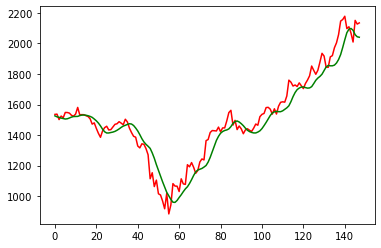

<Figure size 2160x1080 with 0 Axes>

In [241]:
plt.plot(y_test,color ='red',label ='Real_Stock_Price')
plt.plot(y_pred,color ='green',label ='Predicted_Stock_Price')
plt.figure(figsize=(30, 15))
plt.show()

In [242]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.923781906716011

In [243]:
sixty_days_before_7Aug= pd.read_excel(r'D:\Documents\New Microsoft Excel Worksheet.xlsx')

In [244]:
t1 = sixty_days_before_7Aug.iloc[:,:].values

In [245]:
t1 = np.array(t1)

In [246]:
t1.reshape(60,1)

array([[1435.949951],
       [1459.400024],
       [1440.75    ],
       [1408.900024],
       [1433.699951],
       [1441.25    ],
       [1431.550049],
       [1424.050049],
       [1445.550049],
       [1472.25    ],
       [1464.400024],
       [1520.349976],
       [1535.699951],
       [1541.650024],
       [1579.800049],
       [1581.699951],
       [1569.5     ],
       [1537.150024],
       [1572.150024],
       [1537.699951],
       [1588.800049],
       [1614.550049],
       [1617.699951],
       [1615.349976],
       [1655.900024],
       [1759.400024],
       [1746.150024],
       [1720.900024],
       [1727.849976],
       [1717.900024],
       [1741.650024],
       [1723.150024],
       [1704.099976],
       [1737.599976],
       [1760.349976],
       [1787.900024],
       [1851.800049],
       [1823.449951],
       [1798.      ],
       [1824.25    ],
       [1878.050049],
       [1935.      ],
       [1917.      ],
       [1844.      ],
       [1843.400024],
       [19

In [247]:
t1 = sc.fit_transform(t1)
t2 = np.array(t1)
t2 =t2.reshape(1,60,1)

In [248]:
t2.shape

(1, 60, 1)

In [249]:
s = model.predict(t2)

In [250]:
s

array([[0.86082375]], dtype=float32)

In [251]:
prediction_closing_7_Aug = sc.inverse_transform(s)

In [252]:
prediction_closing_7_Aug
# Real Closing price on 7 Aug 2022 = 2,146.00

array([[2070.7012]], dtype=float32)

array([0.00130073])